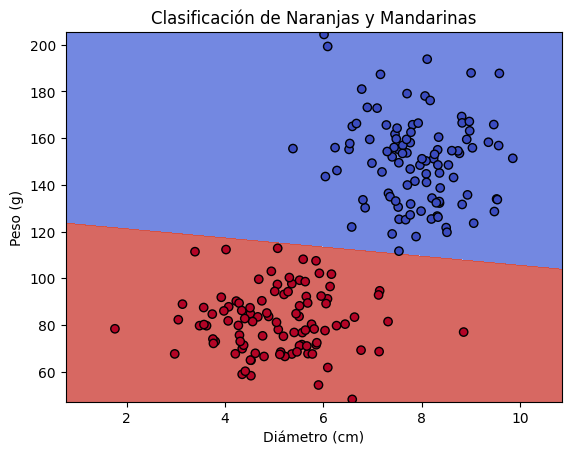

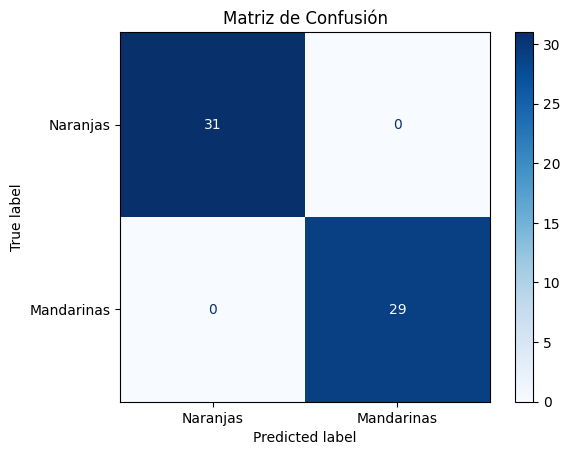

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Generar datos ficticios
np.random.seed(42)
n_samples = 100

# Naranjas: diámetro más grande y peso más alto
naranjas_diametro = np.random.normal(8, 1, n_samples)  # Diámetro en cm
naranjas_peso = np.random.normal(150, 20, n_samples)   # Peso en gramos

# Mandarinas: diámetro más pequeño y peso más bajo
mandarinas_diametro = np.random.normal(5, 1, n_samples)  # Diámetro en cm
mandarinas_peso = np.random.normal(80, 15, n_samples)    # Peso en gramos

# Combinar los datos
X = np.vstack((np.column_stack((naranjas_diametro, naranjas_peso)),
               np.column_stack((mandarinas_diametro, mandarinas_peso))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))  # 0: Naranjas, 1: Mandarinas


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

# Crear una malla para graficar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir sobre la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los datos y la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('Diámetro (cm)')
plt.ylabel('Peso (g)')
plt.title('Clasificación de Naranjas y Mandarinas')
plt.show()


# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Naranjas', 'Mandarinas'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()